<font color = green >

## Home Task
</font>

In [35]:
from sklearn.neural_network import MLPClassifier
import os
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt


<font color = green>

### Brest Cancer Dataset

</font>



In [36]:
# https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y= True)
print ('X.shape= ', X.shape)
print ('y.shape= ', y.shape)

X.shape=  (569, 30)
y.shape=  (569,)


In [37]:
from sklearn.model_selection import train_test_split

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X, y, random_state=0)

In [38]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_scaled_bc = sc.fit_transform(X_train_bc)
X_test_scaled_bc = sc.transform(X_test_bc)


In [39]:
# YOUR_CODE.  Preproces data, train classifier and evaluate the perfromance on train and test sets 
# START_CODE 
breast_cancer_clf= MLPClassifier(hidden_layer_sizes=(10,100))
breast_cancer_clf.fit(X_train_scaled_bc, y_train_bc)

print("train accuracy= {:.3%}".format(breast_cancer_clf.score(X_train_scaled_bc, y_train_bc)))
print("test accuracy= {:.3%}".format(breast_cancer_clf.score(X_test_scaled_bc, y_test_bc)))
# END_CODE 


train accuracy= 99.296%
test accuracy= 96.503%


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<font color = green>

##  Signs dataset

</font>



In [40]:
# signs data set (fingers)
def load_dataset():
    path = "/Users/rostyslavbalytskiy/Projects/python study/camp /camp_homework/lesson9_nn_task/data"
    fn =  os.path.join(path , 'train_signs.h5')
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels

    fn =  os.path.join(path , 'test_signs.h5')
    test_dataset =  h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    
    return X_train, y_train, X_test, y_test, classes


In [41]:
X_train, y_train, X_test, y_test, classes = load_dataset()
y_train = y_train.ravel()
y_test = y_test.ravel()
print ('X_train.shape=', X_train.shape)
print ('X_test.shape=', X_test.shape)
print ('y_train.shape=', y_train.shape)
print ('y_test.shape=', y_test.shape)

X_train.shape= (1080, 64, 64, 3)
X_test.shape= (120, 64, 64, 3)
y_train.shape= (1080,)
y_test.shape= (120,)


In [42]:
def display_samples_in_grid(X, n_rows, n_cols= None, y = None ):
    if n_cols is None: 
        n_cols= n_rows
    indices = np.random.randint(0, len(X),n_rows*n_cols)
    for i in range (n_rows): 
        for j in range (n_cols):
            index = n_rows*i+j           
            ax = plt.subplot(n_rows,n_cols,index+1) 
            plt.imshow(X[indices[index]])
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')

    plt.tight_layout(h_pad=1)


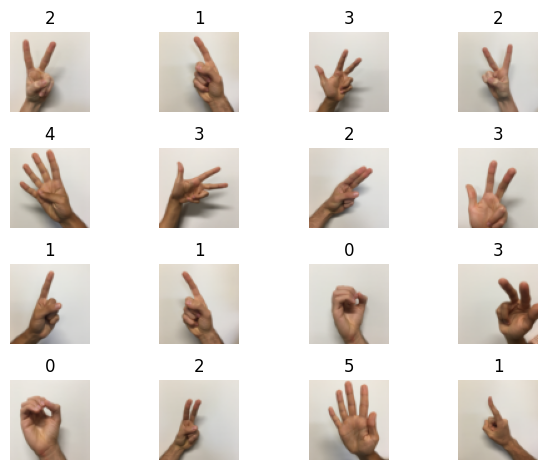

In [43]:
plt.figure()

display_samples_in_grid(X_train, n_rows=4, y= y_train)

In [45]:
# plt.gcf().canvas.set_window_title('Train set')

In [46]:
# Not in use 
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

In [49]:
# YOUR_CODE.  Preproces data
signs_sc = StandardScaler()

X_train_scaled = signs_sc.fit_transform(X_train.reshape(X_train.shape[0], -1))
X_test_scaled = signs_sc.transform(X_test.reshape(X_test.shape[0], -1))

# START_CODE 
# END_CODE     

print ("number of training examples = " + str(X_train_scaled.shape[1]))
print ("number of test examples = " + str(X_test_scaled.shape[1]))
print ("X_train_scaled shape: " + str(X_train_scaled.shape))

print ("X_test_scaled shape: " + str(X_test_scaled.shape))

number of training examples = 12288
number of test examples = 12288
X_train_scaled shape: (1080, 12288)
X_test_scaled shape: (120, 12288)


### Expected result 

```
number of training examples = 12288
number of test examples = 12288
X_train_scaled shape: (1080, 12288)
X_test_scaled shape: (120, 12288)
```

In [65]:
# YOUR_CODE.  Train classifier and evaluate the perfromance on train and test sets 
signs_clf = MLPClassifier(
    solver='lbfgs',
    random_state=1,
    alpha= 0.01,
    max_iter=1000,
    verbose= True
)
signs_clf.fit(X_train_scaled, y_train)
# START_CODE 
print("train accuracy= {:.3%}".format(signs_clf.score(X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(signs_clf.score(X_test_scaled, y_test)))
# END_CODE

train accuracy= 100.000%
test accuracy= 90.000%


### Expected result 

```
train accuracy= 100.000%
test accuracy= 90.000%
```

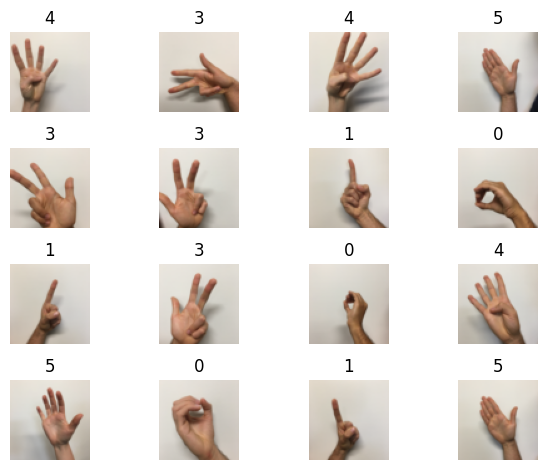

In [68]:
plt.figure()

predicted = signs_clf.predict(X_test_scaled)

display_samples_in_grid(X_test, n_rows=4, y= predicted)


In [ ]:
plt.gcf().canvas.set_window_title('Test set prediction')

### Compare with SVM 

In [69]:
from sklearn.svm import SVC

In [70]:
clf = SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train_scaled, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled, y_test)))

train accuracy= 100.000%
test accuracy= 65.000%
